If you find any bugs in this ipython notebook, please contact reisinger@cogsci.jhu.edu
If there's an error say "something is undefined", please run the cell that contains the definition or use "menu -> cell -> run all above"

Original notebook by Weichao Qiu, modified by Drew Reisinger

# Theoretical part

Visual illusions teach us about the assumptions that the brain makes
when interpreting images. These assumptions are often correct but occasionally
wrong, as shown by the illusions. Write a few (two or three)
sentences explaining each of the illusions below. Which ones of them involve
low-, mid-, or high-level vision? Note that all these illusions are
discussed in the Early Vision chapter by Yuille and Kersten.

## Stereokinetic Depth

An in-built assumption that shapes tend to be rigid, and interprets the changing rings as a rigid 3-D shape moving in depth, rather than as an ameoba-like form changing shape.

This demonstrates how our mid-level vision works, by making this kind of assumption.

## Motion binding.

When the edges of lines are covered, the human brain tries to fill in missing information.
This is why it thinks that it is actually a one rigid figure moving instead of 4 different lines.
In my opinion, this belongs to mid-level vision, as geometrical figure is being recogized.

## Checker-shadow illusion

The illusion occures because the human brain automatically tries to estimate the shadow based on the 3d shape that is being estimated. For that reason it incorrectly considers the grey pixel to be darker. I think that this belongs to the high-level vision, as actual 3d shape of cylinder is estimated and the shadow position is estimated which involved high level interpretation of the scene.


## Biological Motion

The effect demonstrates a high level interpretation of scene. As demonstrated in in previous examples high level vision can be very invariant to appearance changes. Like in this case brain recognizes human only by observing the relative motion of the joints that are represented by points.

## Neon Colour Spreading

The effect demonstrates how brain interpretes the shape of circle based only on lines that move together.
Even though there is no actual circle on the picture, the brain assumes that it's a circle as the lines rotate together as if they were part of a circle. In my opinion, it's a mid-level vision because it's shape information.

## Ames Window + Ballerina

When the short edge of the trapezoid is far away, its shape is interpreted as a rectangle with perspective distortion. When the short edge is close to the observer, it is re-interpreted as the far-away edge. The re-interpretation of the closer short edge as the far-away edge by simple geometry leads to inverted perception of the rotation direction, inverted sense of the visible side of the fence, and consequently, the seeming melt-through of the ballerina.

In my opinion, it's a mid level vision as it takes care of perspective projection estimation.

## Hollow Face Illusion

This effect demonstrates that human rely on prior knowledge of source of light.
As the faces that are being presented in the video eiather artificially lighted or located in a room with special lightning, there is no fact that can tell us that we see inverted faces. This happens because human uses prior knowlege or position of source or light -- like that it usually comes from above, from sun.

This is also relevan to mid level vision.

## Kanizsa triangle

The Kanizsa triangle (left panel) is perceived as a white triangular surface which
partially occludes three black disks, it shows the tendency of humans to interpret images
in terms of geometric structures. 

This belongs to mid-level vision, as it involves shapes.


## The Dress Color Enigma

Colours are judged rather correctly, even under coloured room illumination, because our visual system guesses on incident light direction and colour and “subtracts” it. This is quite similar for all of us.

In my opinion, this belongs to mid-level vision, as this process is held without involving any high-level
identities.

## Hidden Figures – Dalmatian Dog

The experiment demonstrates an example that sometimes our brain can't go to higher level identities (like dog in this case) when there is not enough low-level cues from which the higher level information can be inferred.

In this particular example, there is not enough edges for the person to clearly see the shape of the dog.

So this example relates to the low-level vision.

## Ball and the shadow illusion

Example demonstrates how our brain takes the shadow information into account, assuming that the source of light comes from above. This helps our brain to understand that at the first part of the video the ball was alleviated and moved along the closer border of the surface. While at the second part it was moved diagonally from one corner to another. The assumption of light source position and inference based on the shadow helped brain in this case.

In my opinion, this belongs to the mid-level vision.

# Initialization

In [1]:
%
# Import python library for this notebook
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt # package for plot function

# show figures inline
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Generate sinusoid stimuli

Sinusoid $ I(\mathbf{x}) = A \cos(\mathbf{\omega} \mathbf{x} + \rho) $

$ A $ is the amplitude, $ \rho $ is the phase, and $ \mathbf{\omega} $ is the frequency.

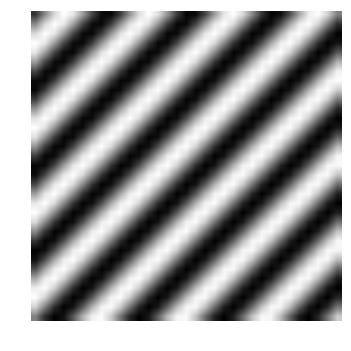

In [2]:
def genSinusoid(sz, A, omega, rho):
    # Generate Sinusoid grating
    # sz: size of generated image (width, height)
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1)) # a BUG is fixed in this line

    stimuli = A * np.cos(omega[0] * x  + omega[1] * y + rho)
    return stimuli

theta = np.pi/4
omega = [np.cos(theta), np.sin(theta)]
sinusoidParam = {'A':1, 'omega':omega, 'rho':np.pi/2, 'sz':(32,32)}
myimshow(genSinusoid(**sinusoidParam)) 
# ** is a special syntax in python, which enables passing a key-value dictionary as parameter

# Generate gabor filter
A general type of Gabor filter[1] can be defined:  
$$ g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right) $$
[1] https://en.wikipedia.org/wiki/Gabor_filter  

Here we implement a type of Gabor filter which satisfies the neurophysiological constraints for simple cells:   
$$ \psi (x; \omega, \theta, K) = \left[\frac{\omega^2}{ 4 \pi K^2} \exp  \{-(\omega^2/8K^2)[4(x\cdot(cos\theta, sin\theta))^2 + (x \cdot ( -sin \theta, cos \theta))^2]\} \right] \times \left[ \exp \{ iwx \cdot (cos\theta, sin\theta) \} exp(K^2/2) \right] $$

1.5140274644582012e-05

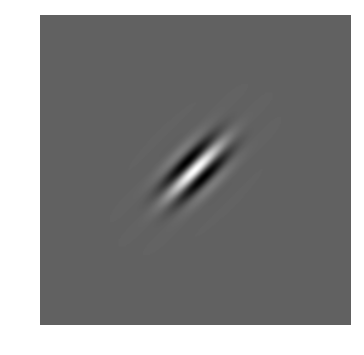

In [3]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
#     myimshow(gauss)
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
#     myimshow(sinusoid)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((256,256), 0.3, np.pi/4, func=np.cos) 
# change func to "cos", "sin" can generate sin gabor or cos gabor, here we pass a function name as a parameter
myimshow(g)
np.mean(g)

# Interactive: Gabor demo
If you evaluate the next cell in your computer, you can see an interactive demo like this.  
<img src="data/gabor/snapshot.png">

**Drag the slider to change parameters, and see the change of gabor filter.**

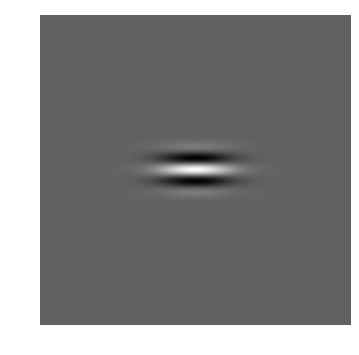

In [33]:
from IPython.html.widgets import interact, interactive, fixed
def demoGabor(theta, omega):
    myimshow(genGabor((128,128), omega, theta))
interact(demoGabor, theta=(0,np.pi,np.pi/8), omega=(0.1,1,0.1))

# Generate gabor filter bank

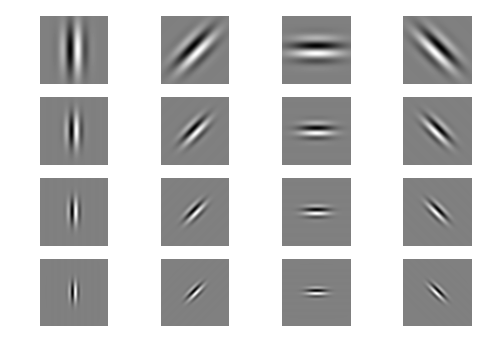

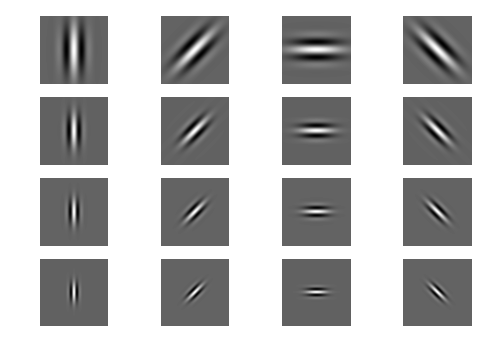

In [7]:
theta = np.arange(0, np.pi, np.pi/4) # range of theta
omega = np.arange(0.2, 0.6, 0.1) # range of omega
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(128, 128)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

plt.figure()
n = len(sinFilterBank)
for i in range(n):
    plt.subplot(4,4,i+1)
    # title(r'$\theta$={theta:.2f}$\omega$={omega}'.format(**gaborParams[i]))
    plt.axis('off'); plt.imshow(sinFilterBank[i])

plt.figure()
for i in range(n):
    plt.subplot(4,4,i+1)
    # title(r'$\theta$={theta:.2f}$\omega$={omega}'.format(**gaborParams[i]))
    plt.axis('off'); plt.imshow(cosFilterBank[i])

# Apply filter bank to zebra image

CPU times: user 7.11 s, sys: 0 ns, total: 7.11 s
Wall time: 7.14 s
CPU times: user 7.08 s, sys: 5.67 ms, total: 7.08 s
Wall time: 7.18 s
CPU times: user 7.16 s, sys: 0 ns, total: 7.16 s
Wall time: 7.35 s


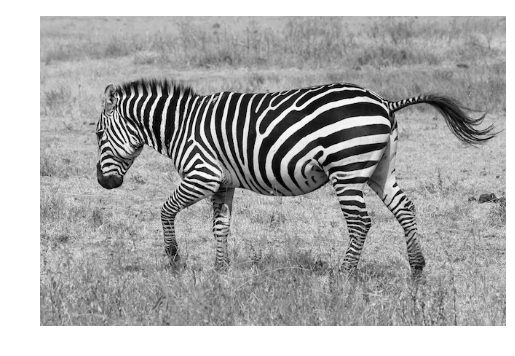

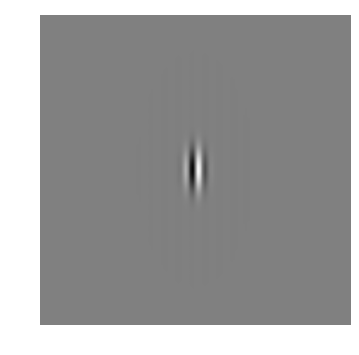

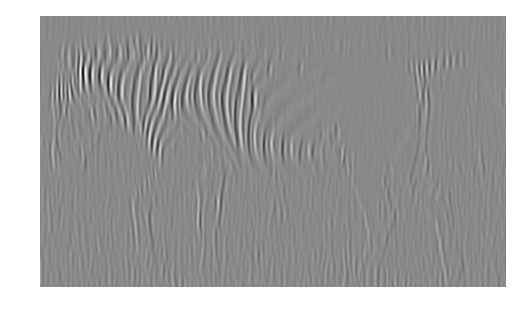

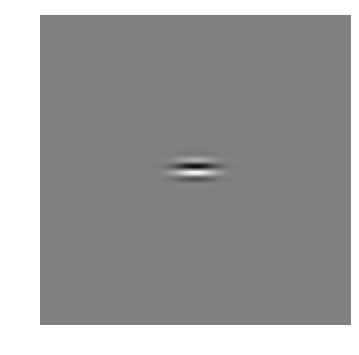

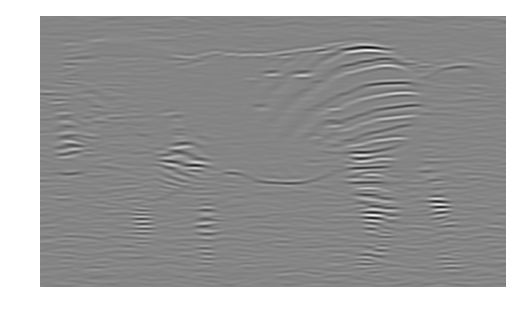

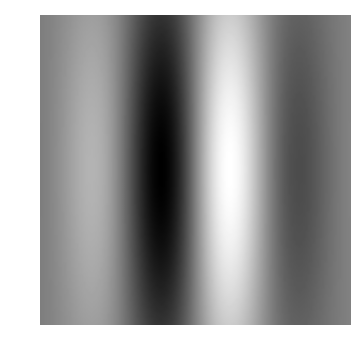

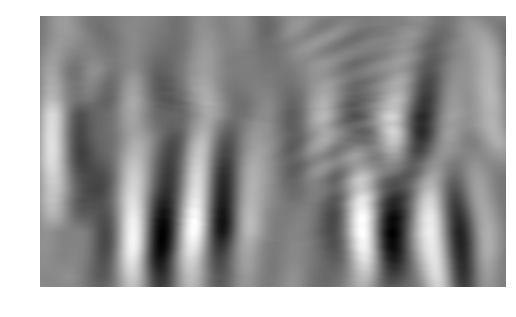

In [58]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
zebra = rgb2gray(plt.imread('data/gabor/Zebra_running_Ngorongoro.jpg'))
plt.figure(); myimshow(zebra)

# Horizontal lines -- can be found using the filters with theta equal to pi/2
horizontalGabor = sinFilterBank[-2]

sinGabor = sinFilterBank[-3]


# Solution: Each of those manually found filters process the image and give
# high responses in the regions of vertical stripes, horizontal stripes, and legs
# of zebra.

# Vertical stripes gabor filter
plt.figure(); myimshow(genGabor(func=np.sin, theta=0, omega=1.1, sz=(128, 128)))

%time res = convolve2d(zebra, genGabor(func=np.sin, theta=0, omega=1.1, sz=(128, 128)), mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure

# Horizontal stripes gabor filter
plt.figure(); myimshow(genGabor(func=np.sin, theta=1.57, omega=1.1, sz=(128, 128)))

%time res = convolve2d(zebra, genGabor(func=np.sin, theta=1.57, omega=1.1, sz=(128, 128)), mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure

# Legs gabor filter
plt.figure(); myimshow(genGabor(func=np.sin, theta=0, omega=0.1, sz=(128, 128)))

%time res = convolve2d(zebra, genGabor(func=np.sin, theta=0, omega=0.1, sz=(128, 128)), mode='valid') # Will take about one minute
plt.figure(); myimshow(res); # title('response') Book figure

In [34]:
params

[(0.0, 0.20000000000000001),
 (0.78539816339744828, 0.20000000000000001),
 (1.5707963267948966, 0.20000000000000001),
 (2.3561944901923448, 0.20000000000000001),
 (0.0, 0.30000000000000004),
 (0.78539816339744828, 0.30000000000000004),
 (1.5707963267948966, 0.30000000000000004),
 (2.3561944901923448, 0.30000000000000004),
 (0.0, 0.40000000000000008),
 (0.78539816339744828, 0.40000000000000008),
 (1.5707963267948966, 0.40000000000000008),
 (2.3561944901923448, 0.40000000000000008),
 (0.0, 0.50000000000000011),
 (0.78539816339744828, 0.50000000000000011),
 (1.5707963267948966, 0.50000000000000011),
 (2.3561944901923448, 0.50000000000000011)]

"Zebra running Ngorongoro" by Muhammad Mahdi Karim (www.micro2macro.net)

For examples of filters applied to texture processing see: http://scikit-image.org/docs/dev/auto_examples/plot_gabor.html

# Homework 1.1
Apply Gabor filters to the zebra image. Adjust the frequency and orientation of the Gabors to find the horizontal and vertical stripes. Plot the output. Can you also find Gabors that respond to the legs?

# Quadrature pair, simple/complex cell

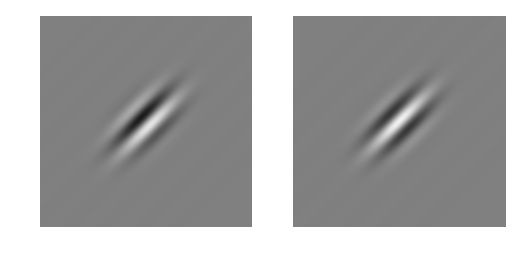

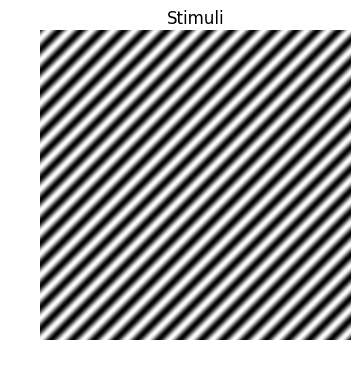

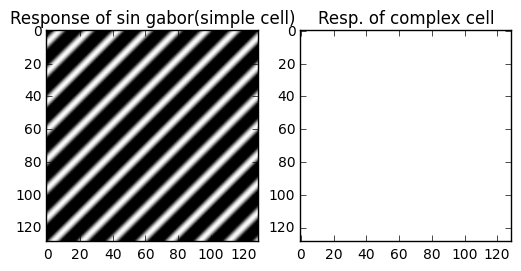

In [57]:
theta = np.pi/4
sinGabor = genGabor((129,129), 0.4, theta, np.sin)
cosGabor = genGabor((129,129), 0.4, theta, np.cos)
plt.figure(); 
plt.subplot(121); plt.axis('off'); plt.imshow(sinGabor, vmin=-0.2, vmax=0.2)
plt.subplot(122); plt.axis('off'); plt.imshow(cosGabor, vmin=-0.2, vmax=0.2)

theta = np.pi/4 + np.pi
sinusoid = genSinusoid((256,256), 1, (omega*np.sin(theta), omega*np.cos(theta)), 0)
plt.figure(); myimshow(sinusoid); plt.title('Stimuli')

response = convolve2d(sinusoid, sinGabor, mode='valid')
response2 = convolve2d(sinusoid, cosGabor, mode='valid')

plt.figure(); 
plt.subplot(121); plt.imshow(response, vmin=0); plt.title('Response of sin gabor(simple cell)')
plt.subplot(122); plt.imshow(response**2 + response2**2, vmin=0); plt.title('Resp. of complex cell')

**Complex cell is tuned to frequency and less sensitive to phase change**

# Homework 1.2: Find parameter of an unknown gabor filter
Find the tuning curve of an idealized neuron by measuring its response to different sinusoids. The neuron is a Gabor function so you need to find its preferred orientation and phase. Use equations from _Slide: [SimpleCellsVisualCortex](http://www.stat.ucla.edu/~yuille/courses/Stat271-Fall15/SimpleCellsVisualCortex.pdf) - The Tuning of Gabor Filters _ if you want.

(0.68947368421052635, 0.50773214603471406)


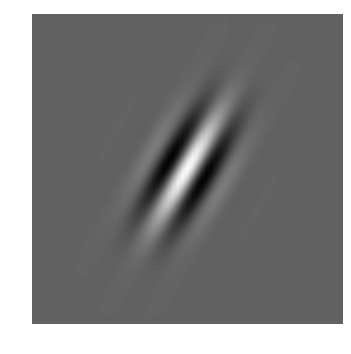

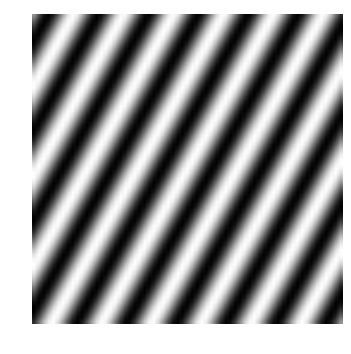

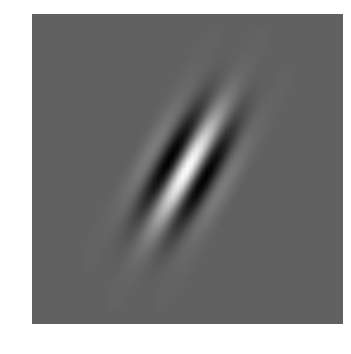

In [103]:
import pickle
import numpy as np
from itertools import product

# The parameter of this gabor(cell) is unknown
# Try to find its parameter:
unknownGabor = pickle.load(open('data/gabor/unknownGabor.data', 'rb'))
plt.figure(); myimshow(unknownGabor)

# You can use sinusoid as a stimuli
# For example:
rho = 0
omega = 0.8
theta = np.pi / 2

# Solutioin: Do brute-force search by finding the sinusoid with
# maximum response value -- the case where gabor filter parameters
# will match sinusoid parameters.


# Reduce search space by visually inspecting the gabor filter
omega_brute_force = np.linspace(start=0.5, stop=0.9, num=20)
theta_brute_force = np.linspace(start=0, stop=np.pi, num=100)

combintations = product(omega_brute_force, theta_brute_force)

biggest_response = -float("Inf")

for comb in combintations:
    
    omega = comb[0]
    theta = comb[1]

    sinusoid = genSinusoid(unknownGabor.shape, 1, (omega*np.cos(theta), omega*np.sin(theta)), rho)
    response = convolve2d(sinusoid, unknownGabor, mode='valid')
    
    if response > biggest_response:
        best_params = comb
        biggest_response = response

omega = best_params[0]
theta = best_params[1]

# Visualize found solution
sinusoid = genSinusoid(unknownGabor.shape, 1, (omega*np.cos(theta), omega*np.sin(theta)), rho)
plt.figure(); myimshow(sinusoid)

# Print parameters of a found gabor filter
print(best_params)

# Let's print the reconstructed gabor
g = genGabor(unknownGabor.shape, omega, theta, func=np.cos) 
myimshow(g)

# Demo: Gaussian, Laplacian of Gaussian

/home/dan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


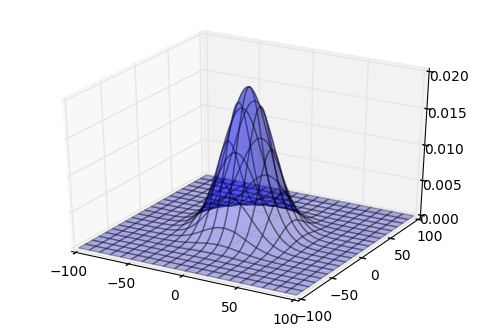

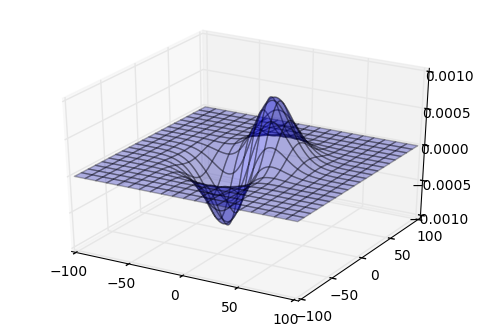

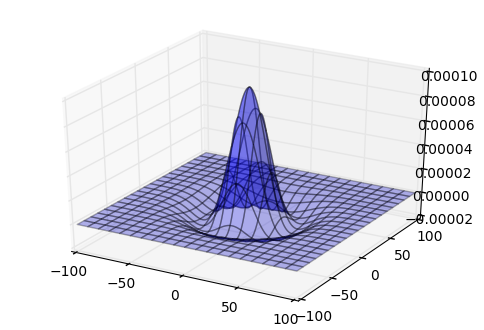

In [105]:
# Utility function to plot 3D surface
def surf(X, Y, Z, **kargs): 
    # Plot 3D data as surface, similar to surf(X,Y,Z) of http://www.mathworks.com/help/matlab/ref/surf.html
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, **kargs)
    
sigma = 20
from mpl_toolkits.mplot3d import Axes3D

[X, Y] = np.meshgrid(np.arange(-100, 101), np.arange(-100, 101))
Z = 1/(np.sqrt(2.0 * np.pi) * sigma) * np.exp(-(X**2+Y**2)/(2.0*sigma**2))

dx = np.roll(Z, 1, axis=1) - Z
dx2 = np.roll(dx, 1, axis=1) - dx

dy = np.roll(Z, 1, axis=0) - Z
dy2 = np.roll(dy, 1, axis=0) - dy

LoG = -(dx2+dy2)

surf(X, Y, Z, alpha=0.3)
# title('Gaussian')

surf(X, Y, dx + dy, alpha=0.3)
# title('First order derivative')

surf(X, Y, LoG, alpha=0.3)
# title('Second order derivative (Laplacian of Gaussian)')

# Homework 1.3  Find the parameter of Laplacian of Gaussian

1. Briefly describe in words what is a quadrature pair and the difference between simple and complex cells.
2. Find the parameter $\sigma$ of a Laplacian of Gaussian filter by measuring its response to different sinusoids.  
Use equation in _[LinearModelsSimpleCells](http://www.stat.ucla.edu/~yuille/courses/Stat271-Fall15/LinearModelsSimpleCells%281%29.pdf) - The Response of a Center-Surround Cell to sinusoids_ if you want.

Answer.

Complex cells are sensitive to orientation but they are less sensitive than simple
cells to the spatial position of the stimuli. They are increasingly
tuned to more complex structures and are less sensitive to the precise positions
of the stimuli.

A complex cell can be modelled as a quadrature pair of Gabor filters:
two simple cells which are ninety degrees out of phase (cosine-Gabors and
sine-Gabors).

Strength of response: [[ 0.09203237]]


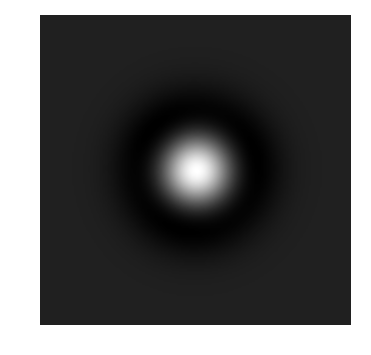

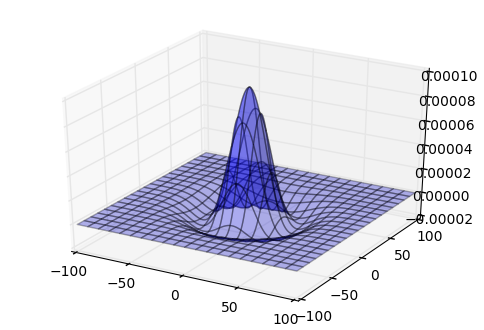

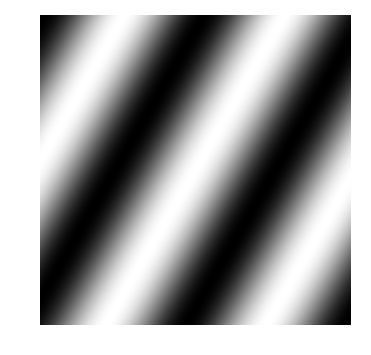

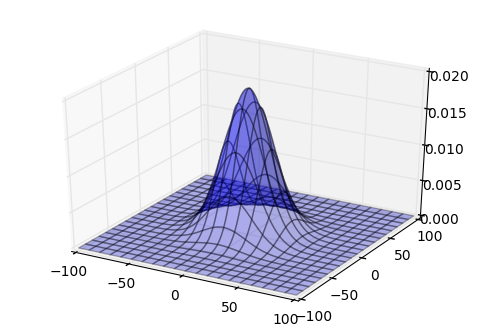

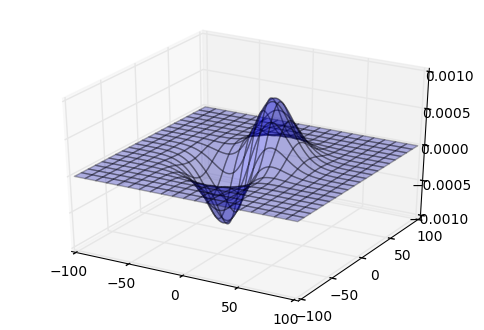

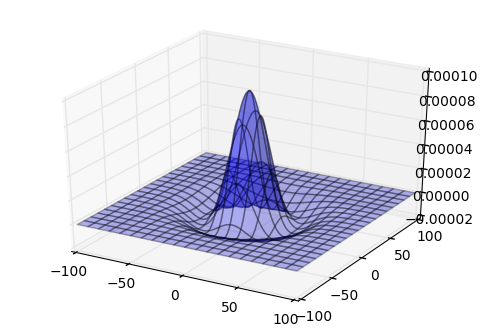

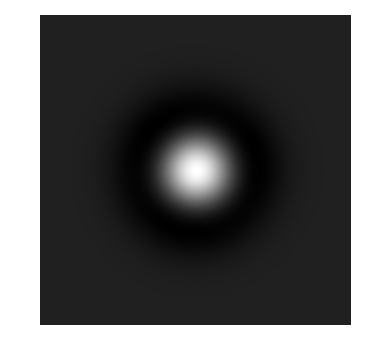

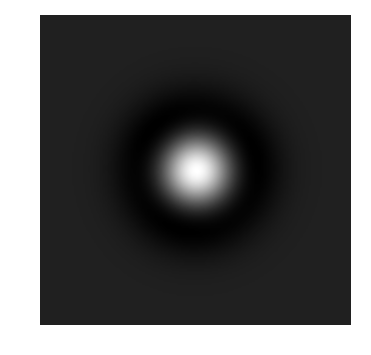

In [124]:
import pickle

unknownLoG = pickle.load(open('data/gabor/unknownLoG.data', 'rb'))
plt.figure(); myimshow(unknownLoG)
[X, Y] = np.meshgrid(np.arange(-100, 101), np.arange(-100, 101))
surf(X, Y, unknownLoG, alpha=0.3)

# You can use sinusoid as a stimuli
# For example:
rho = 0
omega = 0.4
theta = np.pi/6


# Reduce search space by visually inspecting the gabor filter
omega_brute_force = np.linspace(start=0.001, stop=0.2, num=50)

biggest_response = -float("Inf")

for omega in omega_brute_force:
    
    sinusoid = genSinusoid(unknownLoG.shape, 1, (omega*np.cos(theta), omega*np.sin(theta)), rho)
    response = convolve2d(sinusoid, unknownLoG, mode='valid')
    
    if response > biggest_response:
        best_params = omega
        biggest_response = response

omega = best_params


sinusoid = genSinusoid(unknownLoG.shape, 1, (omega*np.cos(theta), omega*np.sin(theta)), rho)
plt.figure(); myimshow(sinusoid)
response = convolve2d(sinusoid, unknownLoG, mode='valid')
print 'Strength of response:', response

sigma = np.sqrt( 2 / omega**2 )

[X, Y] = np.meshgrid(np.arange(-100, 101), np.arange(-100, 101))
Z = 1/(np.sqrt(2.0 * np.pi) * sigma) * np.exp(-(X**2+Y**2)/(2.0*sigma**2))

dx = np.roll(Z, 1, axis=1) - Z
dx2 = np.roll(dx, 1, axis=1) - dx

dy = np.roll(Z, 1, axis=0) - Z
dy2 = np.roll(dy, 1, axis=0) - dy

LoG = -(dx2+dy2)

surf(X, Y, Z, alpha=0.3)
# title('Gaussian')

surf(X, Y, dx + dy, alpha=0.3)
# title('First order derivative')

surf(X, Y, LoG, alpha=0.3)
# title('Second order derivative (Laplacian of Gaussian)')

# Visualize our result with the original function that we tried to estimate.

myimshow(LoG)
myimshow(unknownLoG)

In [117]:
omega

0.064974358974358978